In [16]:
#import mysklearn.mypytable
#from mypytable import MyPyTable
from mysklearn.mypytable import MyPyTable
import matplotlib.pyplot as plt

In [20]:
# Define the discretization function
def plot_scatterplots(data, attribute_pairs):
    plt.figure(figsize=(15, 10))
    for i, (x_attr, y_attr) in enumerate(attribute_pairs):
        plt.subplot(2, 2, i + 1)
        plt.scatter(data.get_column(x_attr), data.get_column(y_attr), alpha=0.5)
        plt.title(f'Scatter Plot of {x_attr} vs {y_attr}')
        plt.xlabel(x_attr)
        plt.ylabel(y_attr)
    plt.tight_layout()
    plt.show()
def discretize_pss_score(table, column_name="PSS_score"):
    """Discretizes the PSS_score column into categories: low, medium, high.

    Args:
        table (MyPyTable): The table containing the PSS_score column.
        column_name (str): Name of the column to discretize. Default is "PSS_score".

    Notes:
        - Assumes the column contains numeric data.
        - Thresholds for discretization:
           low < 14
           moderate
    """
    col_index = table.column_names.index(column_name)

    for row in table.data:
        if isinstance(row[col_index], (int, float)):
            if row[col_index] < 14:
                row[col_index] = "low"
            elif 27 <= row[col_index]:
                row[col_index] = "moderate"
            else:
                row[col_index] = "high"

In [23]:
myTable = MyPyTable().load_from_file("stress_detection.csv")
#discretize_pss_score(myTable)
#myTable.save_to_file("cleaned_data.csv")

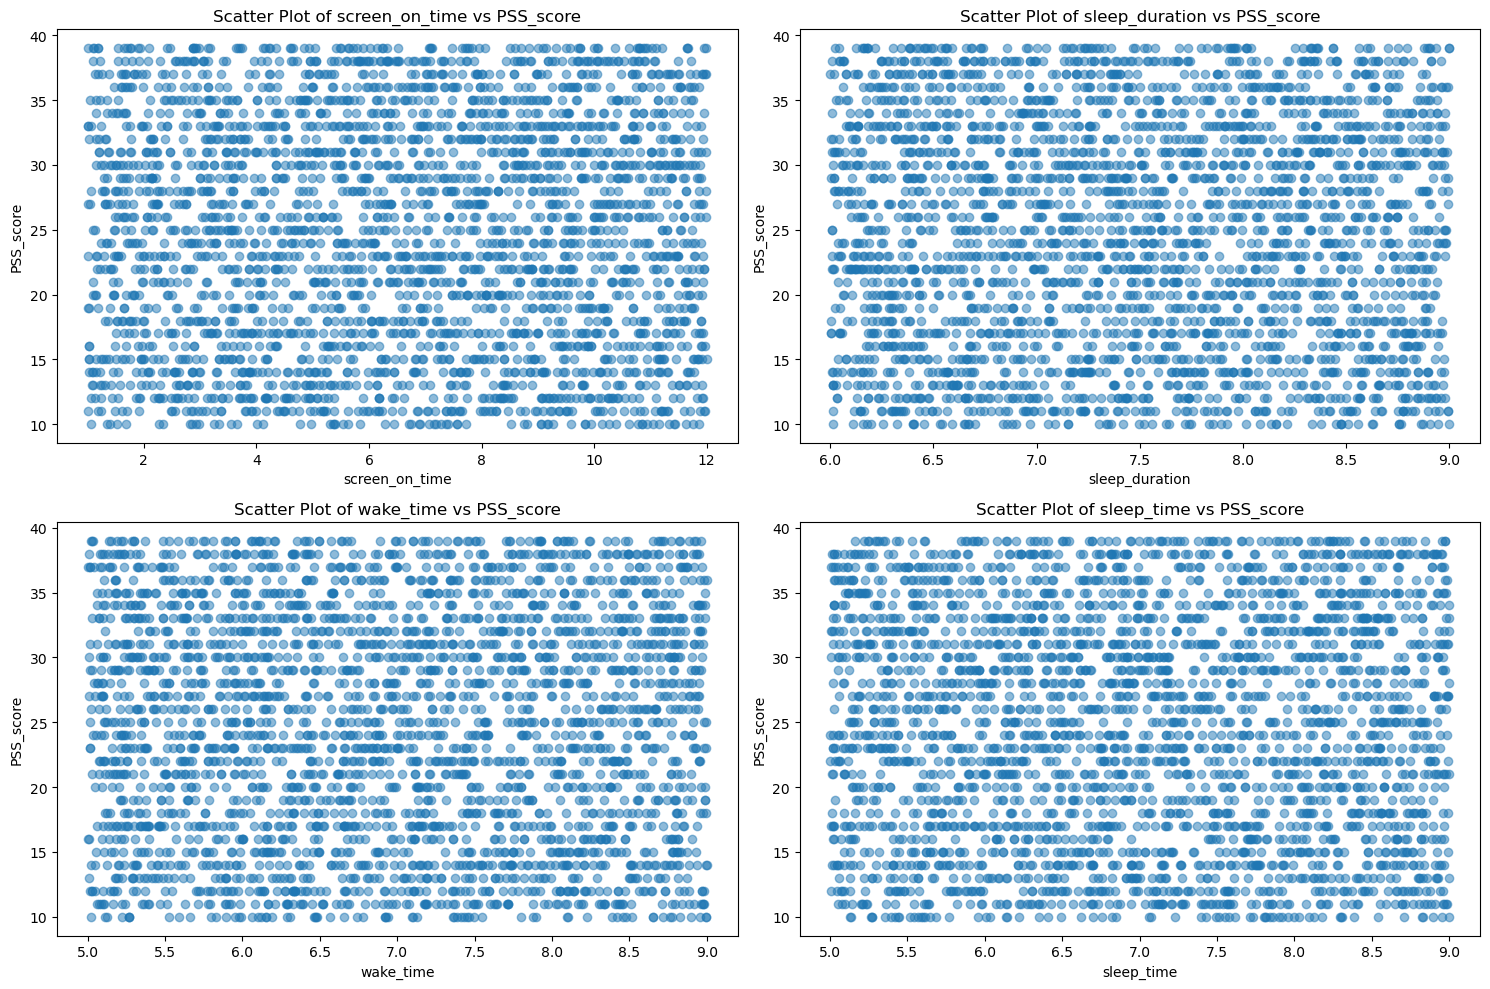

In [25]:
# Define pairs of attributes for scatter plots
#scatter_pairs = [('PSS_score', 'screen_on_time'), ('PSS_score', 'sleep_duration'), ('PSS_score', 'wake_time'), ('PSS_score', 'sleep_time')]
scatter_pairs = [('screen_on_time', 'PSS_score'), ('sleep_duration', 'PSS_score'), ('wake_time', 'PSS_score'), ('sleep_time', 'PSS_score')]
# Plot scatter plots for the selected pairs
plot_scatterplots(myTable, scatter_pairs)